In [1]:
%matplotlib notebook
import numpy as np
import glob
import matplotlib.pyplot as plt
import copy

In [2]:
def load_all_data():
    path_list = glob.glob('data_converted/*.npz')
    data_list = [np.load(path, allow_pickle=True) for path in path_list]
    return data_list

In [3]:
# EEG Fpz-Cz against time for one whole sleep
def plot_eeg_against_time_for_one_sleep(data):
    num_of_stages = 5
    x_values = [i * 0.01 / 60 for i in range(len(data['x'])*len(data['x'][0]))]
    y_values_nested = data['x']
    
    stage_x_values = [x_values for j in range(num_of_stages)]
    stage_y_values_nested = [copy.deepcopy(y_values_nested) for j in range(num_of_stages)]
    
    for i in range(len(y_values_nested)):
        for j in range(num_of_stages):
            if j != data['y'][i]:
                stage_y_values_nested[j][i] = np.nan
    
    stage_y_values = [[] for i in range(num_of_stages)]
    for i in range(len(stage_y_values_nested)):
        for item in stage_y_values_nested[i]:
           stage_y_values[i].extend(item)

    for i in range(len(stage_x_values)):
        plt.plot(stage_x_values[i], stage_y_values[i], label='stage ' + str(i))
    
    subject_name = data['header_raw'].item()['local_subject_id']
    plt.title('EEG against time for ' + subject_name)
    plt.ylabel('EEG Fpz-Cz')
    plt.xlabel('Time/min')
    plt.legend(loc='upper center',  bbox_to_anchor=(0.5, 1.0), ncol=3)
    plt.show()

In [4]:
def plot_eeg_in_frequency_domain(data):
    num_of_stages = 5
    time_step = 0.01
    
    # initialize y values(power specturm density) and x values(frequency)
    num_of_data_points = len(data['x'][0])
    stage_y_values_psd = [[] for j in range(num_of_stages)]
    x_values_freq = (1/(time_step*num_of_data_points)) * np.arange(num_of_data_points)
    
    # calculate psd for every data['y'] output
    stage_data_count = [0 for j in range(num_of_stages)]
    for i in range(len(data['y'])):
        stage = data['y'][i]
        fhat = np.fft.fft(data['x'][i])
        psd = (fhat * np.conj(fhat)).real / num_of_data_points
        if len(stage_y_values_psd[stage]) == 0:
            stage_y_values_psd[stage] = psd
        else:
            stage_y_values_psd[stage] += psd
        stage_data_count[stage] += 1
       
    # get average
    for i in range(num_of_stages):
        stage_y_values_psd[i] /= stage_data_count[i]
    
#     # clean
#     for i in range(num_of_stages):
#         indices = stage_y_values_psd[i] > 4e-10
#         stage_y_values_psd[i] *= indices
    
    rg = np.arange(len(x_values_freq)//2)
    fig, axs = plt.subplots(5, figsize=(8, 8))
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:red']
    fig.suptitle('EEG in frequency domain')
    for i in range(num_of_stages):
        axis = axs[i]
        axis.plot(x_values_freq[rg], stage_y_values_psd[i][rg], colors[i])
        axis.set_title('Stage ' + str(i))
        axis.set_ylabel('PSD')
        axis.set_xlabel('Frequency/hz')
    fig.tight_layout()    
    plt.show()
    

<IPython.core.display.Javascript object>


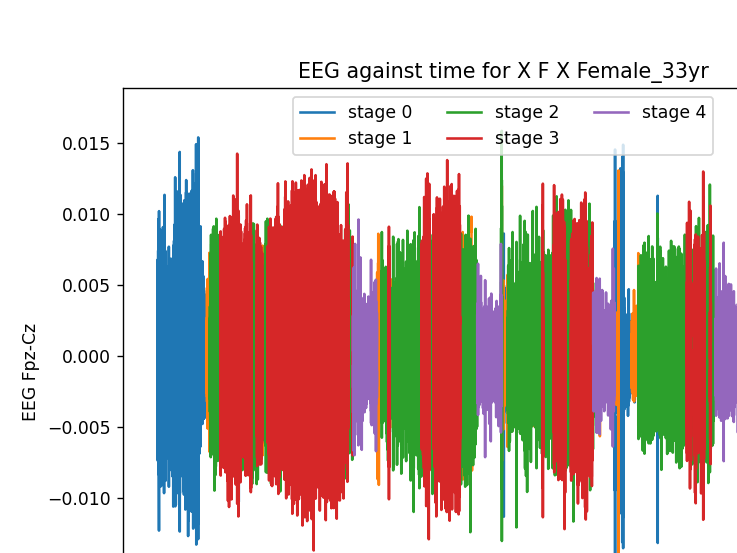

<IPython.core.display.Javascript object>


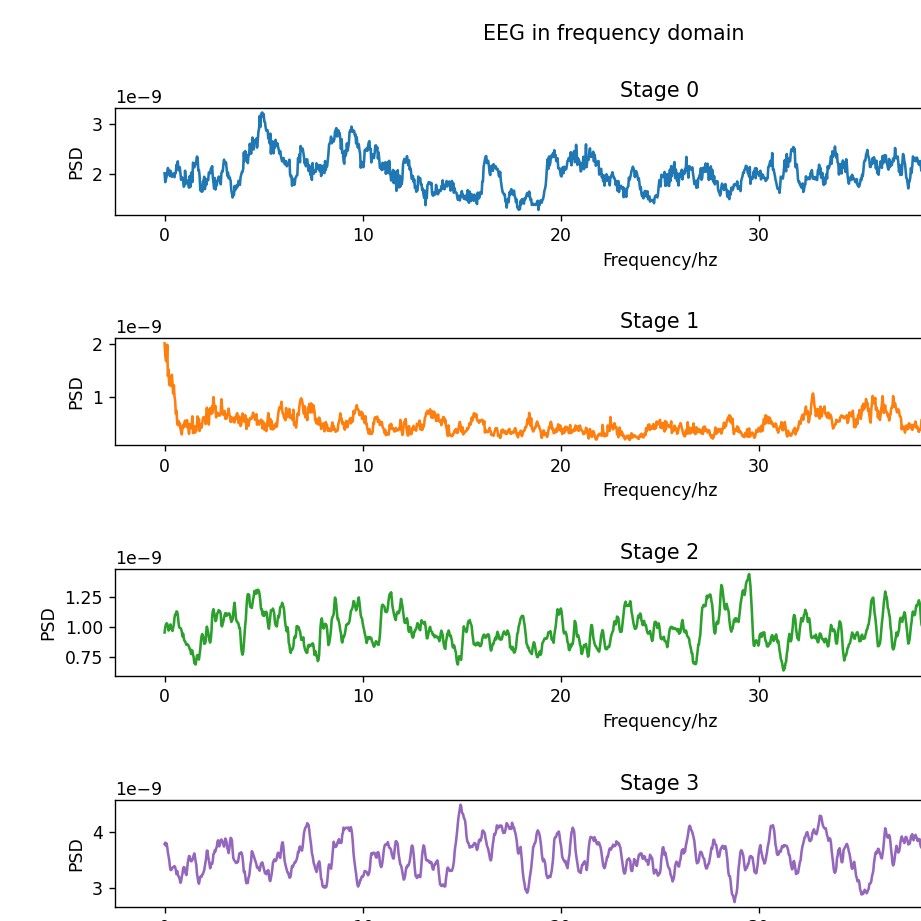

In [5]:
data_list = load_all_data()
data = data_list[0]
keys = data.files
plot_eeg_against_time_for_one_sleep(data)
plot_eeg_in_frequency_domain(data)